# Beispiel 1 aus 6. Vorlesung

In [2]:
import wntr
import math
import matplotlib.pyplot as plt
from helper import to_cbs, to_ls, plot_results, da

## Lastfall 1: maximaler Bedarf

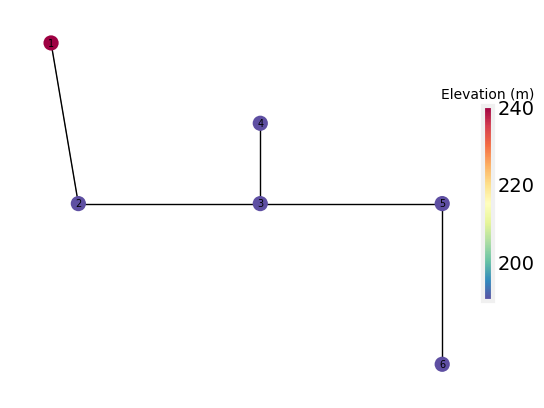

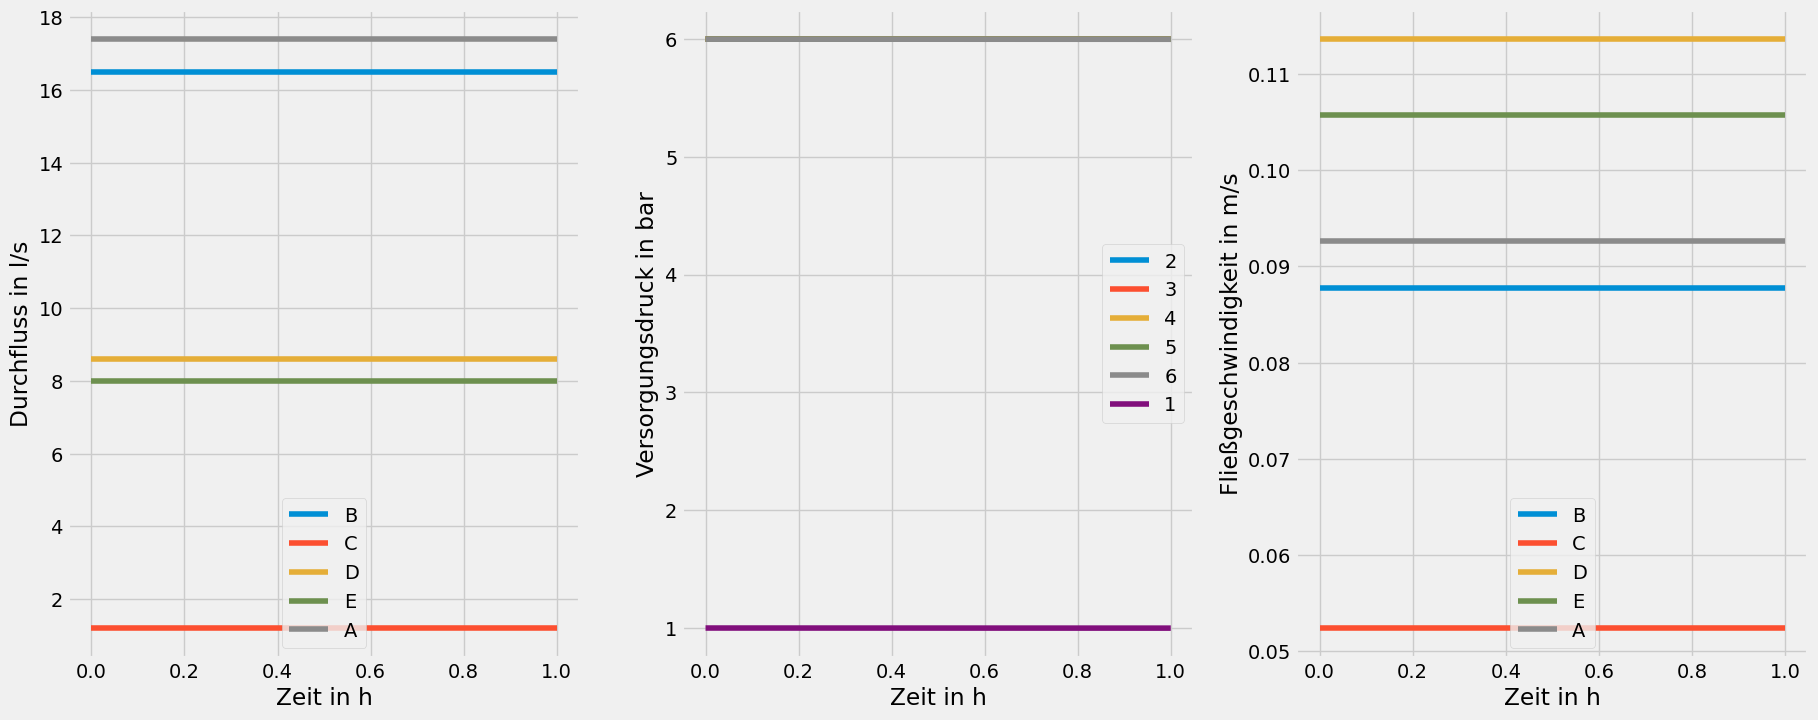

In [2]:
# neues Modell erstellen
wn = wntr.network.WaterNetworkModel()
wn.options.hydraulic.demand_model = 'PDD'

wn.add_pattern('pat', [1])

# Knoten generieren
wn.add_junction('2', base_demand=to_cbs(0.9), demand_pattern='pat', elevation=190, coordinates=(0,0))
wn.add_junction('3', base_demand=to_cbs(1.8+0.6+0.3+4), demand_pattern='pat', elevation=190, coordinates=(2,0))
wn.add_junction('4', base_demand=to_cbs(1.2), demand_pattern='pat', elevation=190, coordinates=(2,1))
wn.add_junction('5', base_demand=to_cbs(0.6), demand_pattern='pat', elevation=190, coordinates=(4,0))
wn.add_junction('6', base_demand=to_cbs(8), demand_pattern='pat', elevation=190, coordinates=(4,-2))

# Rohrnetzwerk erstellen
r = 300 #*10-3
wn.add_pipe('B', '2', '3', length=200, diameter=da[315], roughness=r)
wn.add_pipe('C', '3', '4', length=100, diameter=da[110], roughness=r)
wn.add_pipe('D', '3', '5', length=200, diameter=da[200], roughness=r)
wn.add_pipe('E', '5', '6', length=200, diameter=da[200], roughness=r)


# Hochbehälter
wn.add_tank('1', elevation=240, init_level=10, min_level=2.0, max_level=10, diameter=50, overflow=False, coordinates=(-0.3,2))
wn.add_pipe('A', '1', '2', length=3000, diameter=da[315], roughness=400)

# Simulation
wn.options.time.duration = 1*3600
sim = wntr.sim.WNTRSimulator(wn)
results = sim.run_sim()

# Ergebnisse darstellen
plot_results(wn, results)

In [3]:
to_ls(results.node['demand'])

2    3    4    5    6     1
0     0.9  6.7  1.2  0.6  8.0 -17.4
3600  0.9  6.7  1.2  0.6  8.0 -17.4

## Lastfall 2: Brandfall

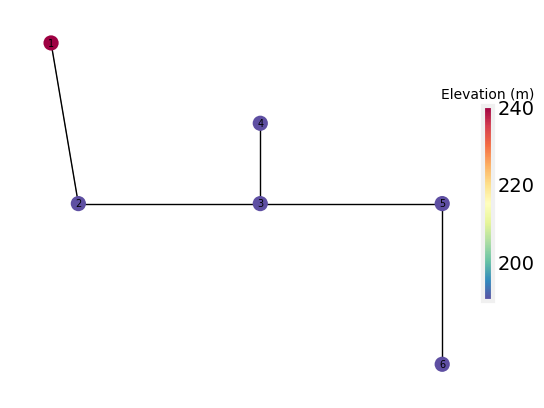

In [4]:
# neues Modell erstellen
wn = wntr.network.WaterNetworkModel()
wn.options.hydraulic.demand_model = 'PDD'


wn.add_pattern('pat', [1])

# Knoten generieren
wn.add_junction('2', base_demand=to_cbs(0.375), demand_pattern='pat', elevation=190, coordinates=(0,0))
wn.add_junction('3', base_demand=to_cbs(0.75+0.25+0.125+4), demand_pattern='pat', elevation=190, coordinates=(2,0))
wn.add_junction('4', base_demand=to_cbs(0.5), demand_pattern='pat', elevation=190, coordinates=(2,1))
wn.add_junction('5', base_demand=to_cbs(0.25+13.3), demand_pattern='pat', elevation=190, coordinates=(4,0))
wn.add_junction('6', base_demand=to_cbs(8+13.3), demand_pattern='pat', elevation=190, coordinates=(4,-2))

# Rohrnetzwerk erstellen
r = 300 #*10-3
wn.add_pipe('B', '2', '3', length=200, diameter=da[315], roughness=r)
wn.add_pipe('C', '3', '4', length=100, diameter=da[110], roughness=r)
wn.add_pipe('D', '3', '5', length=200, diameter=da[200], roughness=r)
wn.add_pipe('E', '5', '6', length=200, diameter=da[200], roughness=r)


# Hochbehälter
wn.add_tank('1', elevation=240, init_level=10, min_level=2.0, max_level=10, diameter=50, overflow=False, coordinates=(-0.3,2))
wn.add_pipe('A', '1', '2', length=3000, diameter=0.300, roughness=400)

# Simulation
wn.options.time.duration = 1*3600
sim = wntr.sim.WNTRSimulator(wn)
results = sim.run_sim()

# Ergebnisse darstellen
plot_results(wn, results)

In [5]:
to_ls(results.node['demand'])

2      3    4      5     6      1
0     0.375  5.125  0.5  13.55  21.3 -40.85
3600  0.375  5.125  0.5  13.55  21.3 -40.85